# Food network

In [1]:
#to open sep window for graph: Kernel > Restart & Clear Output, then run this
#%matplotlib tk

In [2]:
from ipywidgets import widgets
from ipywidgets import *
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import networkx as nx
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
import json
import itertools
#%matplotlib inline
#to open sep windows: Kernel > Restart & Clear Output, then run this
#%matplotlib tk

# Read 'results.json' directly into a python dictionary.  The results file only has the "node" section
# results.json(all,nodes only.json looks like this:
#{"node": [{"name": "salt", "occurence": [{"cuisine": "all_cuisines", "num": 0}, {"cuisine": "brazilian", "num": 194},
#{"cuisine": "british", "num": 407}, #{"cuisine": "cajun_creole", "num": 743}, {"cuisine": "chinese", "num": 907},
#{"cuisine": "filipino", "num": 421}, {"cuisine": "french", "num": 1203}, {"cuisine": "greek", "num": 572},...
#results(all, nodes only)

# Read 'results.json' directly into python dictionary

results_file = open('./results_nodes_only.json')#using NOT so Light json
results_str = results_file.read()
results = json.loads(results_str)
nodes = results['node']


# Load results data into node and link lists

def Graph_plot(min_aff,ing_labels):
    link_list=[]
   
    for ing in nodes:
        for x in ing['occurence']:
            if x['num'] > min_aff:# min number of affinities (num(min))change this to visualize less or more
                link_list.append(tuple([ing['name'],x['cuisine']]))

#convert the list of tupples to a list of nodes, i.e, [('brazilain', salt)... --> ['brazilain, salt,...] ising itertools and use set to eliminate duplciates.

    node_list =(set(list(itertools.chain(*link_list))))

#Set graph
    Food_Graph = nx.Graph()

#add edges to Food_Graph

    Food_Graph.add_edges_from(link_list)

#add nodes to Food_Graph <-- Ist thsi necessary???

    Food_Graph.add_nodes_from(node_list)

#Set node sizes.  Networkx requres a separtaat list with 1:1 correspondence to nodes list.  So loop through entire list and compare with the cuisine modes

    cuisine_nodes = ['brazilian', 'british', 'cajun_creole', 'chinese', 'filipino', 'french', 'greek', 'indian', 'irish', 'italian', 'jamaican', 'japanese', 'korean', 'mexican', 'moroccan', 'russian', 'southern_us', 'spanish', 'thai', 'vietnamese']

    size_list=list(Food_Graph.nodes)

    for index, item in enumerate(size_list):
        if item in cuisine_nodes:
            size_list[index] = 200
        else:
            size_list[index] = 50

#set node_labels

    node_labels = {}
    for node in Food_Graph.nodes():
        if node in cuisine_nodes:
            node_labels[node] = node.title()


#Set node colors.   Networkx requres a separtaat list with 1:1 correspondence to nodes list

    color_list=list(Food_Graph.nodes)

    for index, item in enumerate(color_list):
        if item in cuisine_nodes:
            color_list[index] = 'b'
        else:
            color_list[index] = 'r'

# Draw the graph

    pos=nx.spring_layout(Food_Graph)### Caluate node positions once and include the 'pos' variable argeument in the draw commands

#Label just the nodes
#change "with_labels=True" when less nodes present so one can see the labels
    if ing_labels :
        nx.draw(Food_Graph, pos, edge_color='y', with_labels=True , node_size=size_list, node_color = color_list)
        nx.draw_networkx_labels(Food_Graph,pos,labels=node_labels)
    else:
        nx.draw(Food_Graph, pos, edge_color='y', with_labels=False , node_size=size_list, node_color = color_list)
        nx.draw_networkx_labels(Food_Graph,pos,labels=node_labels)
        

    plt.show()

from IPython.display import display
text = widgets.Text()
display('FOOD NETWORK, speciify min affinities,close window to pick different min_aff')
interact(Graph_plot, min_aff = [20,50,100,150,180,250],ing_labels = False)


'FOOD NETWORK, speciify min affinities,close window to pick different min_aff'

A Jupyter Widget

<function __main__.Graph_plot>

# Find specific ingredient cuisines interconnections

In [3]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import networkx as nx
import matplotlib.pyplot as plt
import json
%matplotlib inline

# Read 'results.json' directly into python dictionary

results_file = open('./results_nodes_only.json')#using NOT so Light json
results_str = results_file.read()
results = json.loads(results_str)
nodes = results['node']


# Load results data into node and link lists


#use list of certain ingredients - not all of them
def two_ing(ing_list):
    
    #ing_list = ['corn', 'pumpkin'] 
    cuisine_nodes = ['brazilian', 'british', 'cajun_creole', 'chinese', 'filipino', 'french', 'greek', 'indian', 'irish', 'italian', 'jamaican', 'japanese', 'korean', 'mexican', 'moroccan', 'russian', 'southern_us', 'spanish', 'thai', 'vietnamese']
    new_nodes = []
    for ing in nodes:
        if ing['name'] in ing_list:
            new_nodes.append(ing)
#print(new_nodes) 
    node_list=[]
    link_list=[]
    for ing in new_nodes:
        node_list.append(ing['name'])
        for x in ing['occurence']:
            if x['num'] > 0:
                link_list.append(tuple([ing['name'],x['cuisine']]))

    Light = nx.Graph()
    Light.add_nodes_from(node_list)
    Light.add_edges_from(link_list)

    color_list=list(Light.nodes)

    for index, item in enumerate(color_list):
        if item in cuisine_nodes:
            color_list[index] = 'b'
        else:
            color_list[index] = 'r'

        
    nx.draw(Light,edge_color='y', with_labels=True, node_color = color_list)
#nx.draw_spectral(Light, with_labels=True)

#pos = nx.spring_layout(Light)
#nx.draw_networkx_labels(Light, pos)
    #print(ing_list)
    plt.show()
    
    
#can see connections through edges of the graph
#print(Light.edges)
from IPython.display import display
text = widgets.Text()
display('PREVALENCE OF INGREDIENT X IN CUISINES, ..in search for unusual pairings X+Y')
text = widgets.Text()
display(text)
def handle_submit(sender):
    interact(two_ing, ing_list = text.value)
text.on_submit(handle_submit)
#interact(two_ing,ing_list = a)





'PREVALENCE OF INGREDIENT X IN CUISINES, ..in search for unusual pairings X+Y'

A Jupyter Widget

# Find recipes where given ingredient occurs

In [4]:
allnodes_file = open('./all_cuisine_nodes.json')
allnodes_str = allnodes_file.read()
allnodes_train = json.loads(allnodes_str)
def ingr_and_IDs(N_max,ingredient):
    max_num = 428275
    ingredients = []
    for item in allnodes_train['nodes']:
        ingredients.append(item['ingredients'])
    IDs = []
    for item in allnodes_train['nodes']:
        IDs.append(item['r_id'])
#vary N to produce longer list
    #N = 60
    #max(428275)
    ingr_list = ingredients[0:N_max]


    IDs_list = IDs[0:N_max]


    ingredients_df = pd.DataFrame({'Name': ingr_list, 'ID': IDs_list})
    ingr_DF = ingredients_df.sort_values(['Name'], ascending = False)
    dff = ingr_DF.loc[ingr_DF['Name'] == ingredient]
    return dff
    
from IPython.display import display
text = widgets.Text()
display('SEARCH INGREDIENT IDs')    
interact(ingr_and_IDs, N_max = widgets.IntSlider(min=1,max=10000,step=20,description = 'less recipes'), ingredient='salt')

#ingr_and_IDs(10)

'SEARCH INGREDIENT IDs'

A Jupyter Widget

<function __main__.ingr_and_IDs>

# Search Recipes with particular ingredient

.. what is the recipe "garlic powder" is listed under recipe ID 20130 think about how to combine those ingredients?

In [5]:
def recipe_search(ID):
    recipe = []
    for item in allnodes_train['nodes']:
        if item['r_id'] == ID:
            recipe.append(item['ingredients'])
    print(recipe)

from IPython.display import display
widgets.IntText(
    value=7,
    description='Any:',
    disabled=False
)
#rec_ID = widgets.Text()
#display(rec_ID)

#def handle_submit(sender):
from IPython.display import display
text = widgets.Text()
display('Search Recipes with particular ingredient. EXAMPLE: what is the recipe "garlic powder" is listed under recipe ID 20130 think about how to combine those ingredients?')  
interact(recipe_search,ID=widgets.IntText(
    
    description='recipe ID',
    disabled=False
))
#rec_ID.on_submit(handle_submit)
#recipe_search(45423)   
#interact(recipe_search, ID=45423)

'Search Recipes with particular ingredient. EXAMPLE: what is the recipe "garlic powder" is listed under recipe ID 20130 think about how to combine those ingredients?'

A Jupyter Widget

<function __main__.recipe_search>

# How many ingredients are in each cuisine?

... using original train.json file

In [6]:
#calculates how many recepes per quisine -total number
#modified version
results_file = open('./train.json')#using original json file where recipe's 
#IDs are present per recipe
results_str = results_file.read()
results_train = json.loads(results_str)
#need to remove Southern_US and cajun_creole cuisine as cannot link to a
#particular country
def ingr_per_cuisine():
    cuisines_list = ['brazilian', 'british', 'chinese', 'filipino', 'french', 'greek', 'indian', 'irish', 'italian', 'jamaican', 'japanese', 'korean', 'mexican', 'moroccan', 'russian', 'spanish', 'thai', 'vietnamese']
    recipe_count_list = []
    cu_names_list = []
    for cu in cuisines_list:
        list_id_cu = []#
    
   
        for item in results_train:
        
            if item['cuisine'] == cu:
           
                list_id_cu.append(item["id"])
           
        recipe_count_list.append(len(list_id_cu))
        cu_names_list.append(cu)
    #print(cu,',total number of recepes:',len(list_id_cu))
    
#print(recipe_count_list)

#print(cu_names_list)

#Generating the recipe_count dictionary
    recipe_count = dict(itertools.zip_longest(cu_names_list,recipe_count_list ))
#print(recipe_count)

#Generating recipe_count DataFrame
    recipe_count_DF = pd.DataFrame({'cuisine_name': cu_names_list,'total_num': recipe_count_list})
    sorted_cu_list = recipe_count_DF.sort_values(["total_num"], ascending = False)
    return sorted_cu_list

from IPython.display import display
button = button = widgets.Button(description = 'click me!')
display(button)
text = widgets.Text()
display('How many ingredients are in each cuisine?')  


def on_button_clicked(b):
    print(ingr_per_cuisine())
button.on_click(on_button_clicked)    



A Jupyter Widget

'How many ingredients are in each cuisine?'

# what is the "saltiest"("sweetest", "spyciest"..) cuisine?

... by absolute number of recipes that contain the ingredient like salt, sugar...

# Cuisines by % of given ingredient in recipes,
e.g. what % of recipes in Italian cusine contains ingredient "salt"(bar chart & Table) 

In [7]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
results_file = open('./results_nodes_only.json')
results_str = results_file.read()
results = json.loads(results_str)
nodes = results['node']

recipe_count={'brazilian':467,'british':804,'cajun_creole':1546,'chinese':2673,'filipino':755,\
               'french':2646,'greek':1175,'indian':3003,'irish':667,'italian':7838,'jamaican':526,\
               'japanese':1423,'korean':830,'mexican':6438,'moroccan':821,'russian':489,'southern_us':4320,\
               'spanish':989,'thai':1539,'vietnamese':825}
def percent_ing_cu1(ing):
    
    size_list=[]
    node_list=[]
    ing_cuisine_count = {}

    for i in range(len(nodes)):
        if nodes[i]['name']== ing:
            for j in range(len(nodes[i]['occurence'])-1):
                node_list.append((nodes[i]['occurence'][j+1]['cuisine']))
            
                size_list.append(int((nodes[i]['occurence'][j+1]['num'])/recipe_count[nodes[i]['occurence'][j+1]['cuisine']]*100))
    for i in range(len(node_list)):
    #calcualate % of the ingresident in this cuisine recipes
        ing_cuisine_count[node_list[i]]=size_list[i]

#print("ingredient occurence %,dictionary format",ing_cuisine_count)


    cuisine_nodes = ['brazilian', 'british', 'cajun_creole', 'chinese', 'filipino', 'french', 'greek', 'indian', 'irish', 'italian', 'jamaican', 'japanese', 'korean', 'mexican', 'moroccan', 'russian', 'southern_us', 'spanish', 'thai', 'vietnamese']
#calculating percentge (using ing_cuisine_count dictionary generated above)
    percent_ing=[ing_cuisine_count[c] for c in cuisine_nodes if c in ing_cuisine_count]
#print(percent_ing)

#create the DataFrame cuisine vs % ingredients in recipes

    percent_ing_DF = pd.DataFrame({'% ingredient': percent_ing, 'cuisine_name': cuisine_nodes})

#percent_ing_DF
    #print("TABLE for ingredient:",ing)
#percent_ing_DF
    #return percent_ing_DF.sort_values(['% ingredient','cuisine_name'], ascending =  False)
    percent_ing_DF.plot.bar(x = 'cuisine_name', y = '% ingredient', color = 'green',label = ing)
#ax.set_xlabel("% recipes that contain ingredient")
    plt.show()

#bar plot for % recipes with ingredient (e.g. salt)
#percent_ing_cu('sugar')
from IPython.display import display

text = widgets.Text()
display(text)

def handle_submit(sender):
    interact(percent_ing_cu1, ing = text.value)
text.on_submit(handle_submit)
text1 = widgets.Text()
text1 = 'enter ingredient'
display(text1)

A Jupyter Widget

'enter ingredient'

# Cuisines by % of given ingredient in recipes (TABLE)

In [8]:
results_file = open('./results_nodes_only.json')
results_str = results_file.read()
results = json.loads(results_str)
nodes = results['node']

recipe_count={'brazilian':467,'british':804,'cajun_creole':1546,'chinese':2673,'filipino':755,\
               'french':2646,'greek':1175,'indian':3003,'irish':667,'italian':7838,'jamaican':526,\
               'japanese':1423,'korean':830,'mexican':6438,'moroccan':821,'russian':489,'southern_us':4320,\
               'spanish':989,'thai':1539,'vietnamese':825}
def percent_ing_cu(ing):
    
    size_list=[]
    node_list=[]
    ing_cuisine_count = {}

    for i in range(len(nodes)):
        if nodes[i]['name']== ing:
            for j in range(len(nodes[i]['occurence'])-1):
                node_list.append((nodes[i]['occurence'][j+1]['cuisine']))
            
                size_list.append(int((nodes[i]['occurence'][j+1]['num'])/recipe_count[nodes[i]['occurence'][j+1]['cuisine']]*100))
    for i in range(len(node_list)):
    #calcualate % of the ingresident in this cuisine recipes
        ing_cuisine_count[node_list[i]]=size_list[i]

#print("ingredient occurence %,dictionary format",ing_cuisine_count)


    cuisine_nodes = ['brazilian', 'british', 'cajun_creole', 'chinese', 'filipino', 'french', 'greek', 'indian', 'irish', 'italian', 'jamaican', 'japanese', 'korean', 'mexican', 'moroccan', 'russian', 'southern_us', 'spanish', 'thai', 'vietnamese']
#calculating percentge (using ing_cuisine_count dictionary generated above)
    percent_ing=[ing_cuisine_count[c] for c in cuisine_nodes if c in ing_cuisine_count]
#print(percent_ing)
    
#create the DataFrame cuisine vs % ingredients in recipes

    percent_ing_DF = pd.DataFrame({'% ingredient': percent_ing, 'cuisine_name': cuisine_nodes})

#percent_ing_DF
    
#percent_ing_DF
    percent_ing_DF.sort_values(['% ingredient','cuisine_name'], ascending =  False)
    print("TABLE for ingredient:",ing)
#percent_ing_DF
    return percent_ing_DF.sort_values(['% ingredient','cuisine_name'], ascending =  False)


text = widgets.Text()
display('Visualization of ingredient prevalence in cuisines')



interact(percent_ing_cu, ing = '')
    



'Visualization of ingredient prevalence in cuisines'

A Jupyter Widget

<function __main__.percent_ing_cu>

Plotting as bar chart the ingredient prevalence in cuisines

Connection to diseases data http://www.worldlifeexpectancy.com/life-expectancy-research

Connection to happiness http://worldhappiness.report/ed/2017/

# FOOD and HAPPINESS connection

In [9]:
happ = pd.read_csv('./Happiness.csv')
#happ.sort_values(['Country'], ascending = True)
####
hap_co = happ['Country'].tolist()
ind_l = []

cuisine_nodes_country = ['Brazil', 'South Korea', 'United Kingdom','China', 'Philippines', 'France', 'Greece', 'India', 'Ireland', 'Italy', 'Jamaica', 'Japan', 'Mexico', 'Morocco', 'Russia', 'Spain', 'Thailand', 'Vietnam']

for index, item in enumerate(hap_co):
    if item in cuisine_nodes_country:
        ind_l.append(index)  
#print(ind_l)

####
happ1 = happ.loc[ind_l]

happ1.sort_values(['Country'])
happ1['Country']=happ1['Country'].replace({'Brazil': 'brazilian', 'China': 'chinese','France': 'french', 'Greece': 'greek', 'India': 'indian','Ireland': 'irish','Italy': 'italian','Jamaica': 'jamaican','Japan': 'japanese','Mexico': 'mexican','Morocco': 'moroccan','Philippines': 'filipino','Russia': 'russian', 'South Korea':'korean','Spain':'spanish','Thailand':'thai','United Kingdom':'british','Vietnam':'vietnamese'})
happ1_sorted = happ1.sort_values(['Country'])
#happ1_sorted 


####

results_file = open('./results_nodes_only.json')
results_str = results_file.read()
results = json.loads(results_str)
nodes = results['node']

recipe_count={'brazilian':467,'british':804,'cajun_creole':1546,'chinese':2673,'filipino':755,\
               'french':2646,'greek':1175,'indian':3003,'irish':667,'italian':7838,'jamaican':526,\
               'japanese':1423,'korean':830,'mexican':6438,'moroccan':821,'russian':489,'southern_us':4320,\
               'spanish':989,'thai':1539,'vietnamese':825}
def happiness(ing):
    
    size_list=[]
    node_list=[]
    ing_cuisine_count = {}

    for i in range(len(nodes)):
        if nodes[i]['name']== ing:
            for j in range(len(nodes[i]['occurence'])-1):
                node_list.append((nodes[i]['occurence'][j+1]['cuisine']))
            
                size_list.append(int((nodes[i]['occurence'][j+1]['num'])/recipe_count[nodes[i]['occurence'][j+1]['cuisine']]*100))
    for i in range(len(node_list)):
    #calcualate % of the ingresident in this cuisine recipes
        ing_cuisine_count[node_list[i]]=size_list[i]

#print("ingredient occurence %,dictionary format",ing_cuisine_count)

#cuisine list below excludes cajun_creole and Southern_US

    cuisine_nodes = ['brazilian', 'british', 'chinese', 'filipino', 'french', 'greek', 'indian', 'irish', 'italian', 'jamaican', 'japanese', 'korean', 'mexican', 'moroccan', 'russian', 'spanish', 'thai', 'vietnamese']
#calculating percentge (using ing_cuisine_count dictionary generated above)
    percent_ing=[ing_cuisine_count[c] for c in cuisine_nodes if c in ing_cuisine_count]
#print(percent_ing)

#create the DataFrame cuisine vs % ingredients in recipes

    percent_ing_DF = pd.DataFrame({'% ingredient': percent_ing, 'cuisine_name': cuisine_nodes})
#print("TABLE for ingredient:",ing)
#percent_ing_DF
#percent_ing_DF.sort_values(['% ingredient','cuisine_name'], ascending =  False)
#eliminate the "0%"ingredient
    #percent_ing_DF = percent_ing_DF_0[percent_ing_DF_0['% ingredient'] > 0]
    
#####
    percent_ing_DF_sorted = percent_ing_DF.sort_values(['cuisine_name'], ascending =  True)
    #percent_ing_DF_sorted
#####
    percent_ing_DF_sorted['happiness'] = happ1_sorted['Happiness score'].tolist()
    #print(percent_ing_DF_sorted)
#exclude rows with % ngredient = 0
    h = percent_ing_DF_sorted[percent_ing_DF_sorted['% ingredient'] > 0]
    #print("final df",h)
    
    
    h.plot.scatter(title = ing, x='% ingredient', y='happiness', c = 'b',s = 80)
    
interact(happiness, ing = '')




A Jupyter Widget

<function __main__.happiness>

# Regresson analysis

In [10]:
import numpy as np
import pandas
from pandas import DataFrame, Series
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
import scipy, scipy.stats

happ = pd.read_csv('./Happiness.csv')
#happ.sort_values(['Country'], ascending = True)
####
hap_co = happ['Country'].tolist()
ind_l = []

cuisine_nodes_country = ['Brazil', 'South Korea', 'United Kingdom','China', 'Philippines', 'France', 'Greece', 'India', 'Ireland', 'Italy', 'Jamaica', 'Japan', 'Mexico', 'Morocco', 'Russia', 'Spain', 'Thailand', 'Vietnam']

for index, item in enumerate(hap_co):
    if item in cuisine_nodes_country:
        ind_l.append(index)  
#print(ind_l)

####
happ1 = happ.loc[ind_l]

happ1.sort_values(['Country'])
happ1['Country']=happ1['Country'].replace({'Brazil': 'brazilian', 'China': 'chinese','France': 'french', 'Greece': 'greek', 'India': 'indian','Ireland': 'irish','Italy': 'italian','Jamaica': 'jamaican','Japan': 'japanese','Mexico': 'mexican','Morocco': 'moroccan','Philippines': 'filipino','Russia': 'russian', 'South Korea':'korean','Spain':'spanish','Thailand':'thai','United Kingdom':'british','Vietnam':'vietnamese'})
happ1_sorted = happ1.sort_values(['Country'])
#happ1_sorted 


####

results_file = open('./results_nodes_only.json')
results_str = results_file.read()
results = json.loads(results_str)
nodes = results['node']

recipe_count={'brazilian':467,'british':804,'cajun_creole':1546,'chinese':2673,'filipino':755,\
               'french':2646,'greek':1175,'indian':3003,'irish':667,'italian':7838,'jamaican':526,\
               'japanese':1423,'korean':830,'mexican':6438,'moroccan':821,'russian':489,'southern_us':4320,\
               'spanish':989,'thai':1539,'vietnamese':825}
def happiness(ing):
    
    size_list=[]
    node_list=[]
    ing_cuisine_count = {}

    for i in range(len(nodes)):
        if nodes[i]['name']== ing:
            for j in range(len(nodes[i]['occurence'])-1):
                node_list.append((nodes[i]['occurence'][j+1]['cuisine']))
            
                size_list.append(int((nodes[i]['occurence'][j+1]['num'])/recipe_count[nodes[i]['occurence'][j+1]['cuisine']]*100))
    for i in range(len(node_list)):
    #calcualate % of the ingresident in this cuisine recipes
        ing_cuisine_count[node_list[i]]=size_list[i]

#print("ingredient occurence %,dictionary format",ing_cuisine_count)

#cuisine list below excludes cajun_creole and Southern_US

    cuisine_nodes = ['brazilian', 'british', 'chinese', 'filipino', 'french', 'greek', 'indian', 'irish', 'italian', 'jamaican', 'japanese', 'korean', 'mexican', 'moroccan', 'russian', 'spanish', 'thai', 'vietnamese']
#calculating percentge (using ing_cuisine_count dictionary generated above)
    percent_ing=[ing_cuisine_count[c] for c in cuisine_nodes if c in ing_cuisine_count]
#print(percent_ing)

#create the DataFrame cuisine vs % ingredients in recipes

    percent_ing_DF = pd.DataFrame({'% ingredient': percent_ing, 'cuisine_name': cuisine_nodes})
#print("TABLE for ingredient:",ing)
#percent_ing_DF
#percent_ing_DF.sort_values(['% ingredient','cuisine_name'], ascending =  False)
#eliminate the "0%"ingredient
    #percent_ing_DF = percent_ing_DF_0[percent_ing_DF_0['% ingredient'] > 0]
    
#####
    percent_ing_DF_sorted = percent_ing_DF.sort_values(['cuisine_name'], ascending =  True)
#percent_ing_DF_sorted
#####
    percent_ing_DF_sorted['happiness'] = happ1_sorted['Happiness score'].tolist()
    #print(percent_ing_DF_sorted)

    h = percent_ing_DF_sorted[percent_ing_DF_sorted['% ingredient'] > 0]
    #plotting regression
    import seaborn as sns
    sns.regplot(x='% ingredient', y='happiness', data=h)

    #generating regr. analysis results:
    X = h["% ingredient"]
    Y = h["happiness"]

    result = sm.OLS( Y, X ).fit()
    print(result.summary())
    return h
    
interact(happiness,ing = 'water')



A Jupyter Widget

<function __main__.happiness>

In [11]:
from IPython.core.display import display, HTML
from string import Template
import pandas as pd
import json, random

In [12]:
HTML('''
<script src="lib/sigmajs/sigma.min.js"></script>
<script src="js/sigma-add-method-neighbors.js"></script>
''')

In [13]:
from ipywidgets import widgets
from ipywidgets import *
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import networkx as nx
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
import json
import itertools
#%matplotlib inline
#to open sep windows: Kernel > Restart & Clear Output, then run this
#%matplotlib tk

# Read 'results.json' directly into a python dictionary.  The results file only has the "node" section
# results.json(all,nodes only.json looks like this:
#{"node": [{"name": "salt", "occurence": [{"cuisine": "all_cuisines", "num": 0}, {"cuisine": "brazilian", "num": 194},
#{"cuisine": "british", "num": 407}, #{"cuisine": "cajun_creole", "num": 743}, {"cuisine": "chinese", "num": 907},
#{"cuisine": "filipino", "num": 421}, {"cuisine": "french", "num": 1203}, {"cuisine": "greek", "num": 572},...
#results(all, nodes only)

# Read 'results.json' directly into python dictionary

results_file = open('./results_nodes_only.json')#using NOT so Light json
results_str = results_file.read()
results = json.loads(results_str)
nodes = results['node']


# Load results data into node and link lists

#def Graph_plot(min_aff,ing_labels):
link_list=[]
   
for ing in nodes:
    for x in ing['occurence']:
        if x['num'] > 200:# min number of affinities (num(min))change this to visualize less or more
            link_list.append(tuple([ing['name'],x['cuisine']]))

#convert the list of tupples to a list of nodes, i.e, [('brazilain', salt)... --> ['brazilain, salt,...] ising itertools and use set to eliminate duplciates.

node_list =(set(list(itertools.chain(*link_list))))

#Set graph
Food_Graph = nx.Graph()

#add edges to Food_Graph
#print('NODES:', node_list)
#print('LINKS:', link_list)
Food_Graph.add_edges_from(link_list)

#add nodes to Food_Graph <-- Ist thsi necessary???

Food_Graph.add_nodes_from(node_list)

# visualize as force-directed graph in D3
##HTML( d3_lib.set_styles(['force_directed_graph']) + \
     #### '<script src="lib/d3/d3.min.js"></script>' + \
     # d3_lib.draw_graph('force_directed_graph', {'data': Food_Graph}) )

runnng jupyter on AWS EC2
https://medium.com/@josemarcialportilla/getting-spark-python-and-jupyter-notebook-running-on-amazon-ec2-dec599e1c297

# Graph parameters

AttributeError: 'DegreeView' object has no attribute 'items'

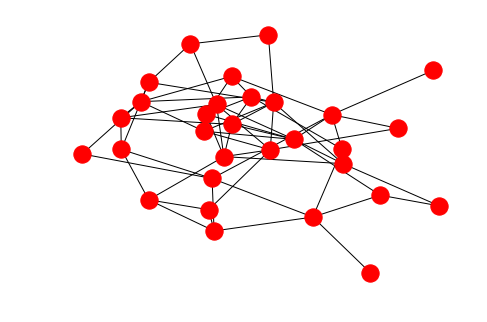

In [14]:
import networkx as nx
import json
import matplotlib.pyplot as plt
%matplotlib inline

G = nx.erdos_renyi_graph(30,4.0/30)
while not nx.is_connected(G):
    G = nx.erdos_renyi_graph(30,4.0/30)
plt.figure(figsize=(6,4));
nx.draw(G)

for ix,deg in G.degree().items():
    G.node[ix]['degree'] = deg
    G.node[ix]['parity'] = (1-deg%2)

for ix,katz in nx.katz_centrality(G).items():
    G.node[ix]['katz'] = katz

G.nodes(data=True)[:5]

In [ ]:
js_text_template = Template(open('js/sigma-graph.js','r').read())

js_text = js_text_template.substitute({'graph_data': json.dumps(graph_data),
                                       'container': 'graph-div'})

html_template = Template('''
<div id="graph-div" style="height:400px"></div>
<script> $js_text </script>
''')
HTML(html_template.substitute({'js_text': Food_Graph}))

In [ ]:
from IPython.core.display import HTML
import d3_lib, random

In [ ]:
from IPython.display import Javascript

In [ ]:
%%javascript
require(['d3'], function(d3){
  //a weird idempotency thing
  $("#network").remove();
  //create canvas
  element.append("<div id='network'></div>");
  $("#network").width("960px");
  $("#network").height("600px");        
  var margin = {top: 20, right: 20, bottom: 30, left: 40};
  var width = 880 - margin.left - margin.right;
  var height = 500 - margin.top - margin.bottom;
  var svg = d3.select("#network").append("svg")
    .style("position", "relative")
    .style("max-width", "960px")
    .attr("width", width + "px")
    .attr("height", (height + 50) + "px")
    .append("g")
    .attr("transform", "translate(" + margin.left + "," + margin.top + ")");
  


    var canvas = d3.select("#network"),
      width = canvas.attr("width"),
      height = canvas.attr("height"),
      ctx = canvas.node().getContext("2d"),
      r = 10,
      color = d3.scaleOrdinal(d3.schemeCategory10),
      simulation = d3.forceSimulation()
        .force("x", d3.forceX(width/2))
        .force("y", d3.forceY(height/2))
        .force("collide", d3.forceCollide(r+1))
        .force("charge", d3.forceManyBody()
          .strength(-1000))
        .force("link", d3.forceLink()
            .id(function (d) { return d.ingredients; }));


      var lineWidthScale = d3.scaleLinear().range([1, 20]);

    d3.json("data/graph_irish_17.json", function (err, graph) {
      if (err) throw err;

      // Create a hash of the linked nodes
      var nodesWithALink = d3.map();
      graph.links.forEach(function (l) {
        if (!nodesWithALink.has(l.source)) {
          nodesWithALink.set(l.source, {
            ingredients:l.source,
            totalCount:0
          });
        }

    var temp = nodesWithALink.get(l.source);
    temp.totalCount+=l.count;
    nodesWithALink.set(l.source, temp);

    if (!nodesWithALink.has(l.target)) {
      nodesWithALink.set(l.target, {
        ingredients:l.target,
        totalCount:0
      });
    }

    temp = nodesWithALink.get(l.target);
    temp.totalCount+=l.count;
    nodesWithALink.set(l.target, temp);
  });


  // convert the hash into an array
  var filteredNodes = nodesWithALink.values();
  simulation.nodes(filteredNodes);
  lineWidthScale.domain(d3.extent(filteredNodes, function (d) { return d.totalCount; }));


  simulation.force("link")
    .links(graph.links);
  simulation.on("tick", update);
  canvas
      .call(d3.drag()
          .container(canvas.node())
          .subject(dragsubject)
          .on("start", dragstarted)
          .on("drag", dragged)
          .on("end", dragended));
  function update() {
    ctx.clearRect(0, 0, width, height);
    ctx.beginPath();
    // ctx.globalAlpha = 0.1;
    ctx.strokeStyle = "#aaa";/* "#aaa" */
    graph.links.forEach(drawLink);
    ctx.stroke();
    ctx.globalAlpha = 1.0;
    filteredNodes.forEach(drawNode);
  }
  function dragsubject() {
    return simulation.find(d3.event.x, d3.event.y);
  }
    });
    function dragstarted() {
      if (!d3.event.active) simulation.alphaTarget(0.3).restart();
      d3.event.subject.fx = d3.event.subject.x;
      d3.event.subject.fy = d3.event.subject.y;
      console.log(d3.event.subject);
    }
    function dragged() {
      d3.event.subject.fx = d3.event.x;
      d3.event.subject.fy = d3.event.y;
    }
    function dragended() {
      if (!d3.event.active) simulation.alphaTarget(0);
      d3.event.subject.fx = null;
      d3.event.subject.fy = null;
    }
    function drawNode(d) {
      ctx.beginPath();
      ctx.fillStyle = color(d.ingredients);
      ctx.moveTo(d.x, d.y);
      // ctx.arc(d.x, d.y, 30*(d.count)/873, 0, Math.PI*2);/*  r=d.gr_id */
      ctx.arc(d.x, d.y, lineWidthScale(d.totalCount), 0, Math.PI*2);/*  r=d.gr_id */
      ctx.fill();

      ctx.font = "12px Arial";
      ctx.fillText( d.ingredients, d.x + r+5, d.y);

      // console.log(d.x);
    }
    function drawLink(l) {
      ctx.moveTo(l.source.x, l.source.y);
      ctx.lineWidth=lineWidthScale(l.count);
      ctx.lineTo(l.target.x, l.target.y);
    }
});